Benchmark performance of AE vs PCA and NMF

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA, NMF
import numpy as np
from tuner import create_tuner
from model import build_model

In [10]:
# Load data splits used to train autoencoder
X_train = np.load("./data/X_train.npy")
X_test = np.load("./data/X_test.npy")
X_valid = np.load("./data/X_valid.npy")

In [11]:
pca_mse = []
ae_mse = []
compression_ratios = []

for i in range(2, 12,2):
    print(f"Starting latent dimensions {i}")
    print("-------")
    tuner = create_tuner(i, overwrite=False)
    best_hps = tuner.get_best_hyperparameters(1)

    ae = build_model(best_hps[0])

    ae.load_weights(f"./weights/ld_{i}/best")

    enc = ae.encoder.predict(X_test)
    dec = ae.decoder.predict(enc)
    compression_ratios.append(
        enc.nbytes/X_test.nbytes
    )
    ae_mse.append(mean_squared_error(dec, X_test))

    X_pca = PCA(n_components = i).fit(np.concatenate([X_train, X_valid]))

    pca = X_pca.inverse_transform(X_pca.transform(X_test))

    pca_mse.append(mean_squared_error(pca, X_test))
    
    print(f"Finished latent dimensions {i}")
    print("------")

nmf_mse = []

for i in range(2, 12, 2):
    X_nmf = NMF(n_components = i).fit(np.concatenate([X_train, X_valid]))

    nmf = X_nmf.inverse_transform(X_nmf.transform(X_test))

    nmf_mse.append(mean_squared_error(nmf, X_test))

Starting latent dimensions 2
-------
INFO:tensorflow:Reloading Tuner from ./tuner/ld_2/tuner_results/tuner0.json


INFO:tensorflow:Reloading Tuner from ./tuner/ld_2/tuner_results/tuner0.json


9701/9701 [==============================] - 2s 236us/step
Finished latent dimensions 2
------
Starting latent dimensions 4
-------
INFO:tensorflow:Reloading Tuner from ./tuner/ld_4/tuner_results/tuner0.json


INFO:tensorflow:Reloading Tuner from ./tuner/ld_4/tuner_results/tuner0.json


9701/9701 [==============================] - 2s 225us/step
Finished latent dimensions 4
------
Starting latent dimensions 6
-------
INFO:tensorflow:Reloading Tuner from ./tuner/ld_6/tuner_results/tuner0.json


INFO:tensorflow:Reloading Tuner from ./tuner/ld_6/tuner_results/tuner0.json


9701/9701 [==============================] - 2s 217us/step
Finished latent dimensions 6
------
Starting latent dimensions 8
-------
INFO:tensorflow:Reloading Tuner from ./tuner/ld_8/tuner_results/tuner0.json


INFO:tensorflow:Reloading Tuner from ./tuner/ld_8/tuner_results/tuner0.json


9701/9701 [==============================] - 2s 217us/step
Finished latent dimensions 8
------
Starting latent dimensions 10
-------
INFO:tensorflow:Reloading Tuner from ./tuner/ld_10/tuner_results/tuner0.json


INFO:tensorflow:Reloading Tuner from ./tuner/ld_10/tuner_results/tuner0.json


9701/9701 [==============================] - 2s 229us/step
Finished latent dimensions 10
------


/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterati

In [12]:
print(ae_mse, pca_mse, nmf_mse) # Raw performance

[0.00033462484554217, 3.6519913954152764e-05, 7.725616729408888e-06, 6.320376065259883e-06, 5.419061785976151e-06] [0.0008403060793252451, 0.00015680932031574926, 4.2289617857300656e-05, 1.4887908823910407e-05, 5.058118636726654e-06] [0.002540284524468948, 0.0003841574661527855, 9.678634155260828e-05, 5.3346763224794786e-05, 3.645035152969523e-05]


In [13]:
print(compression_ratios)

[0.02857142857142857, 0.05714285714285714, 0.08571428571428572, 0.11428571428571428, 0.14285714285714285]


In [22]:
for i in range(0, 5):
    print(f"Latent component {2*(i + 1)}")

    print(f"% change PCA: {(pca_mse[i] - ae_mse[i]) /  pca_mse[i]}")
    print(f"% change NMF : {(nmf_mse[i] - ae_mse[i]) /  nmf_mse[i]}")
    print('------')

Latent component 2
% change PCA: 0.6017821913047811
% change NMF : 0.8682726905907817
------
Latent component 4
% change PCA: 0.7671062288860335
% change NMF : 0.9049350405189621
------
Latent component 6
% change PCA: 0.8173164686548432
% change NMF : 0.9201786470541443
------
Latent component 8
% change PCA: 0.5754691850940692
% change NMF : 0.8815227825795762
------
Latent component 10
% change PCA: -0.07135917031061988
% change NMF : 0.8513303285549558
------


Text(0, 0.5, 'Reconstruction loss')

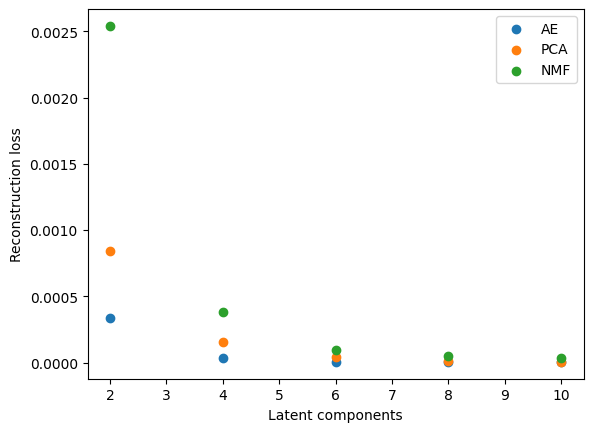

In [23]:
import matplotlib.pyplot as plt

plt.scatter(
    list(range(2,12,2)),
    ae_mse,
    label="AE"
)
plt.scatter(
    list(range(2,12,2)),
    pca_mse,
    label="PCA"
)
plt.scatter(
    list(range(2,12,2)),
    nmf_mse,
    label="NMF"
)
plt.legend()
plt.xlabel("Latent components")
plt.ylabel("Reconstruction loss")